In [1]:
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [2]:
nltk.download('brown')
nltk.download('universal_tagset')

from nltk.corpus import brown

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\VARTUL\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\VARTUL\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [3]:
#add start and end tags:
def add_start_end_tag(sentences_original):
    sentences=[""]*len(sentences_original)
    for i in range(len(sentences_original)):
        sentences[i]=[("<start>","<start>")]+sentences_original[i]+[("<end>","<end>")]
    return sentences

In [4]:
def remove_tags(sentence):
    new_sentence=[]
    for i in sentence:
        new_sentence.append(i[0])

    # print(new_sentence)

    return new_sentence

In [5]:
#splits data in k sets:
def k_splits (k, data):
    splits = {}
    n = len(data)//k
    for i in range(0, k):
        i = int(i)
        if(i+1 == k):
            splits[i]= data[n*i : ]
        else:
            splits[i]=data[n*i : n*(i+1)]
    return splits

In [6]:
def precision(confusion_matrix):
    precision = []
    n = len(confusion_matrix)
    for i in range(0,n):
        sum = 0
        for j in range(0,len(confusion_matrix[i])):
            sum+=confusion_matrix[j][i]
        precision.append(confusion_matrix[i][i]/sum)

    return precision

In [7]:
def recall(confusion_matrix):
    recall = []
    n = len(confusion_matrix)
    for i in range(0,n):
        sum = 0
        for j in range(0,len(confusion_matrix[i])):
            sum+=confusion_matrix[i][j]
        recall.append(confusion_matrix[i][i]/sum)

    return recall

In [8]:
def accuracy_calculator (confusion_matrix):
    actual=0
    count=0
    for i in range(0,len(confusion_matrix)):
        actual+=confusion_matrix[i][i]
        count+=sum(confusion_matrix[i])
    return (actual/count)

In [9]:
def heatmap(confusion_matrix, x_labels, y_labels, x_description, y_description):

    # Example data
    # data = confusion_matrix/np.sum(confusion_matrix,axis=1)
    data = np.array(confusion_matrix)
    plt.figure(figsize=(20,20))
    # Create the heatmap
    plt.imshow(data,  cmap='Spectral', interpolation='none')

    # Add a colorbar
    plt.colorbar()

    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            plt.text(j, i, f'{data[i, j]}', ha='center', va='center', color='black')

    # Add labels (optional)
    
    plt.title('Heatmap Example')
    plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=45)  # Rotation for better readability
    plt.yticks(ticks=np.arange(len(y_labels)), labels=y_labels)

    plt.xlabel(x_description)
    plt.ylabel(y_description)
    # Display the plot
    return plt.show()


In [10]:
def heatmap_percent(confusion_matrix, x_labels, y_labels, x_description, y_description):
    temp = [row[:] for row in confusion_matrix]
    data = []
    for i in range(len(temp)):
        sum = 0
        for j in range(len(temp[i])):
            sum += temp[i][j]
        data.append(sum)
    data = np.sum(temp,axis=1)
    
    # print(data)
    # Example data
    for i in range(len(temp)):
        for j in range(len(temp[i])):
            temp[i][j]/=data[i]
    temp = np.array(temp)
    
    
    plt.figure(figsize=(13,13))
    # Create the heatmap
    plt.imshow(temp,  cmap='Spectral', interpolation='none')

    # Add a colorbar
    plt.colorbar()

    for i in range(temp.shape[0]):
        for j in range(temp.shape[1]):
            plt.text(j, i, f'{temp[i, j]:.2f}', ha='center', va='center', color='black')

    # Add labels (optional)
    
    plt.title('Heatmap Example')
    plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=45)  # Rotation for better readability
    plt.yticks(ticks=np.arange(len(y_labels)), labels=y_labels)

    plt.xlabel(x_description)
    plt.ylabel(y_description)
    # Display the plot
    return plt.show()


In [34]:
class HMM_model:
    def __init__(self):
        self.master_confusion_matrix=[]
        self.master_transition_matrix=[]
        self.master_emission_matrix=[]
        self.master_tags_to_idx={}
        self.master_count_of_each_tag=[]
        self.master_idx_to_tag=[]
        self.master_word_to_idx={}
        self.master_idx_to_word=[]
    
    def creat_tags_meta(self,sentences):
        
        #tag_to_idx: given a tag, what is its index : tags dict {"tag" : "tag_index"}
        #idx_to_tag: given an index what is the tag : tags_reverse list of string
        #count_of_each_tag: count of each tag
        local_tag_to_idx={}
        local_idx_to_tag=[]
        local_count_of_each_tag=[]
        cnt = 0
        for i in range(len(sentences)):
            for j in sentences[i]:
                if j[1] not in local_tag_to_idx:
                    local_tag_to_idx[j[1]] = cnt
                    local_idx_to_tag.append(j[1])
                    local_count_of_each_tag.append(0)
                    cnt += 1
                local_count_of_each_tag[local_tag_to_idx[j[1]]]+=1
        return (local_tag_to_idx, local_idx_to_tag, local_count_of_each_tag)


    def create_word_idx_translation(self,sentences):
        #word to index number
        #word_to_idx is word to index number
        #idx_to_word
        
        idx = 0
        local_word_to_idx={}
        local_idx_to_word = []
        # word_to_idx["<start>"]=idx
        for sentence in sentences:
            for tup in sentence:
                if tup[0] not in local_word_to_idx:
                    
                    local_word_to_idx[tup[0]]=idx
                    idx += 1
                    local_idx_to_word.append(tup[0])
        local_word_to_idx["<unknown>"]=idx
        local_idx_to_word.append("<unknown>")
        return (local_idx_to_word, local_word_to_idx)

        # print('idx--------------------------------', idx)
        # print('worddict--------------------------------', len(word_to_idx))


    def create_transition_matrix(self,sentences, count_of_each_tag, tag_to_idx):
        #creating transition matrix
        #bigram_matrix : count of every bigram tags
        #transmission_matrix : probability of every bigram tags 
        local_bigram_matrix = []
        local_transition_matrix = []
        total_tags = len(count_of_each_tag)
        for i in range(total_tags): 
            local_bigram_matrix.append([0]*total_tags)
            local_transition_matrix.append([0]*total_tags)

        #creating a bigram matrix
        for sentence in sentences:
            for j in range(len(sentence)-1):
                local_bigram_matrix[tag_to_idx[sentence[j][1]]][tag_to_idx[sentence[j+1][1]]]+=1
        # print(bigram_matrix)
        
        #create transition matrix A
        for i in range(total_tags):
            for j in range(total_tags):
                local_transition_matrix[i][j]=(local_bigram_matrix[i][j])/(count_of_each_tag[i])  #adding 1 to numerator and total unique tags in denominator for smoothing(Laplace)
        # print(transition_matrix)
        return local_transition_matrix


    def create_emission_matrix(self,sentences, word_to_idx, tag_to_idx, count_of_each_tag):
        #emission_matrix : given a word, what is the probability of tag
        #emission_count_matrix : given a word, what is the count of each tag that it can have
        # words = list(brown.words())
        words_cnt = len(word_to_idx)
        total_tags = len(tag_to_idx)
        total_words_tag_pair = 0
        for i in count_of_each_tag:
            total_words_tag_pair += i
        local_emission_matrix = []
        
        for i in range(words_cnt):
            local_emission_matrix.append([0]*total_tags)
        # print("--------------------------------------",len(word_to_idx))
        # print("------------------------", len(emission_matrix))
        # print("------------------------", word_to_idx['<unknown>'])
        
        for sentence in sentences:
            for j in sentence:
                local_emission_matrix[word_to_idx[j[0]]][tag_to_idx[j[1]]]+=1

        local_emission_count_matrix = local_emission_matrix

        for i in range(words_cnt):
            for j in range(total_tags):
                local_emission_matrix[i][j] = (local_emission_matrix[i][j])/(count_of_each_tag[j])
        # print("------------------------", emission_matrix[word_to_idx['unknown'])

        # handling missing case
        aux=[0]*len(tag_to_idx.keys())
        # print(tag_to_idx)
        aux[tag_to_idx['NOUN']]=count_of_each_tag[tag_to_idx['NOUN']]/total_words_tag_pair
        aux[tag_to_idx['VERB']]=count_of_each_tag[tag_to_idx['VERB']]/total_words_tag_pair
        aux[tag_to_idx['ADV']]=count_of_each_tag[tag_to_idx['ADV']]/total_words_tag_pair
        aux[tag_to_idx['ADJ']]=count_of_each_tag[tag_to_idx['ADJ']]/total_words_tag_pair
        # print(aux)
        local_emission_matrix[word_to_idx['<unknown>']]=aux

        return local_emission_matrix



    def build_confusion_matrix(self, confusion_matrix, actual, predicted, tag_to_idx):
        #cm: confusion matrix
        for i in range(len(actual)):
            confusion_matrix[tag_to_idx[actual[i][1]]][tag_to_idx[predicted[i]]]+=1


    def HMM_logic(self,input_sentence, transition_matrix, emission_matrix, tag_to_idx, word_to_idx):
        # print(tags_dict)
        tags_output=["<start>"]
        last_prob = 1
        viterbi=[]
        for i in range(len(tag_to_idx)):
            viterbi.append(([0])*len(input_sentence))
        
        viterbi[tag_to_idx["<start>"]][0]=1
        
        for i in range(1, len(input_sentence)):
            word_prob=0
            tags=""
            curr_ob = input_sentence[i]
            if curr_ob not in word_to_idx:
                curr_ob="<unknown>"
            for curr_tag in tag_to_idx:
                max_prob=0
                for prev_tag in tag_to_idx:
                    temp = transition_matrix[tag_to_idx[prev_tag]][tag_to_idx[curr_tag]]*emission_matrix[word_to_idx[curr_ob]][tag_to_idx[curr_tag]]*viterbi[tag_to_idx[prev_tag]][i-1]
                    if temp>max_prob:
                        max_prob=temp
                viterbi[tag_to_idx[curr_tag]][i]=max_prob
                if max_prob>=word_prob:
                    word_prob=max_prob
                    tags=curr_tag
            # if tags=='':
            #     tags='X'
            tags_output.append(tags)

        return tags_output 
    



    def train_model(self,sentences_original, k):

        # model=HMM_model()

        sentences = add_start_end_tag(sentences_original)
        
        #spliting data into k splits
        cross_validation_set=k_splits(k,sentences)
        keys=list(cross_validation_set.keys())

        #creating master meta data i.e. over whole corpus
        (self.master_tags_to_idx, self.master_idx_to_tag, self.master_count_of_each_tag) = self.creat_tags_meta(sentences)
        (self.master_idx_to_word, self.master_word_to_idx) = self.create_word_idx_translation(sentences)
        #instializing master transition, emission and confusion matrices
        # master_transition_matrix = []
        # master_emission_matrix = []
        # master_confusion_matrix = []

        for i in range(len(self.master_count_of_each_tag)):
            self.master_transition_matrix.append([0]*len(self.master_count_of_each_tag))
            self.master_confusion_matrix.append([0]*len(self.master_count_of_each_tag))

        for i in range(len(self.master_word_to_idx)):
            self.master_emission_matrix.append([0]*len(self.master_count_of_each_tag))



        #model building and traing on k sets
        for i in keys:

            #**********************------------------create test and train------------------************************************
            train_data=[]
            for j in cross_validation_set.keys():
                if j!=i:
                    train_data+=cross_validation_set[j]

            test_data=cross_validation_set[i]
            #**********************---------------------------------------************************************
            

            #**********************---------------create tags and words meta data------------------------************************************
            (local_tag_to_idx, local_idx_to_tag, local_count_of_each_tag) = self.creat_tags_meta(train_data)
            (local_idx_to_word, local_word_to_idx) = self.create_word_idx_translation(train_data)
            #**********************---------------------------------------************************************


            #**********************---------------build transition and emission matrix------------------------************************************
            
            #bigram_matrix : count of every bigram tags
            #transmission_matrix : probability of every bigram tags
            #emission_count_matrix : given a word, what is the count of each tag that it can have
            #emission_matrix : given a word, what is the probability of tag
            local_transition_matrix = self.create_transition_matrix(train_data, local_count_of_each_tag, local_tag_to_idx)
            local_emission_matrix = self.create_emission_matrix(train_data, local_word_to_idx, local_tag_to_idx, local_count_of_each_tag)

            #**********************---------------------------------------************************************
            
            #**********************---------------initialize confustion matrix------------------------************************************
            #confusion_matrix : A matrix with rows having actual tag and columns showing predicted tag
            local_confusion_matrix=[]
            for j in range(len(local_count_of_each_tag)):
                local_confusion_matrix.append([0]*len(local_count_of_each_tag))
            #**********************---------------------------------------************************************


            #**********************---------------bulding confustion matrix------------------------************************************
            count=0
            for sen in test_data:
                count+=1
                tags_output = self.HMM_logic(remove_tags(sen), local_transition_matrix, local_emission_matrix, local_tag_to_idx, local_word_to_idx)
                self.build_confusion_matrix(local_confusion_matrix, sen, tags_output, local_tag_to_idx)
            #**********************---------------------------------------************************************

            
            

            


            #**********************---------------build masters------------------------************************************
            for t in range(len(local_count_of_each_tag)):
                row = self.master_idx_to_tag[t]
                for j in range(len(local_count_of_each_tag)):
                    col = self.master_idx_to_tag[j]
                    self.master_transition_matrix[self.master_tags_to_idx[row]][self.master_tags_to_idx[col]] += local_transition_matrix[t][j]
                    self.master_confusion_matrix[self.master_tags_to_idx[row]][self.master_tags_to_idx[col]] += local_confusion_matrix[t][j]
            
            for t in range(len(local_word_to_idx)):
                row = self.master_idx_to_word[t]
                for j in range(len(local_count_of_each_tag)):
                    col = self.master_idx_to_tag[j]
                    self.master_emission_matrix[self.master_word_to_idx[row]][self.master_tags_to_idx[col]] += local_emission_matrix[t][j]
            
            #**********************---------------------------------------*******************************************
                
            print(f"fold {i} done")
        # self.confusion_matrix = np.array(master_confusion_matrix)
        # self.transition_matrix=np.array(master_transition_matrix)
        # self.emission_matrix=np.array(master_emission_matrix)


    
            



In [35]:
#taking data from corpus
sentences_original = brown.tagged_sents(tagset='universal')

In [36]:
model = HMM_model()
model.train_model(sentences_original, 5)

fold 0 done
fold 1 done
fold 2 done
fold 3 done
fold 4 done


In [37]:
print(accuracy_calculator(model.master_confusion_matrix))
for i in model.master_confusion_matrix:
    for j in i:
        print(j, end=" ")
    print()
# print(model.confusion_matrix)

0.9488130470768228
57340 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 135691 31 10 21 898 34 34 199 33 0 1616 2 43 
0 556 208093 2357 5053 28 64 0 129 3 40 12 486 151 
0 43 6350 90130 3043 48 0 0 1882 132 234 5 0 41 
0 13 7143 2015 201915 124 13 0 122 852 10 28 83 94 
0 148 90 91 136 135944 20 0 909 114 6294 22 1 64 
0 211 28 0 3 0 146592 9 1 0 0 1 0 60 
0 1 0 0 0 0 10 53488 17 0 0 0 0 18 
0 812 626 2705 559 2198 50 29 47706 677 742 122 0 13 
0 145 10 251 1806 2 0 0 690 46472 0 32 4 18 
0 2 287 221 41 4322 0 0 84 0 30534 3 0 12 
0 2373 33 13 49 1323 0 0 22 67 7 43029 0 5 
0 0 925 55 537 0 0 0 0 0 0 0 13349 8 
0 16 727 22 259 29 26 0 5 7 2 7 5 281 


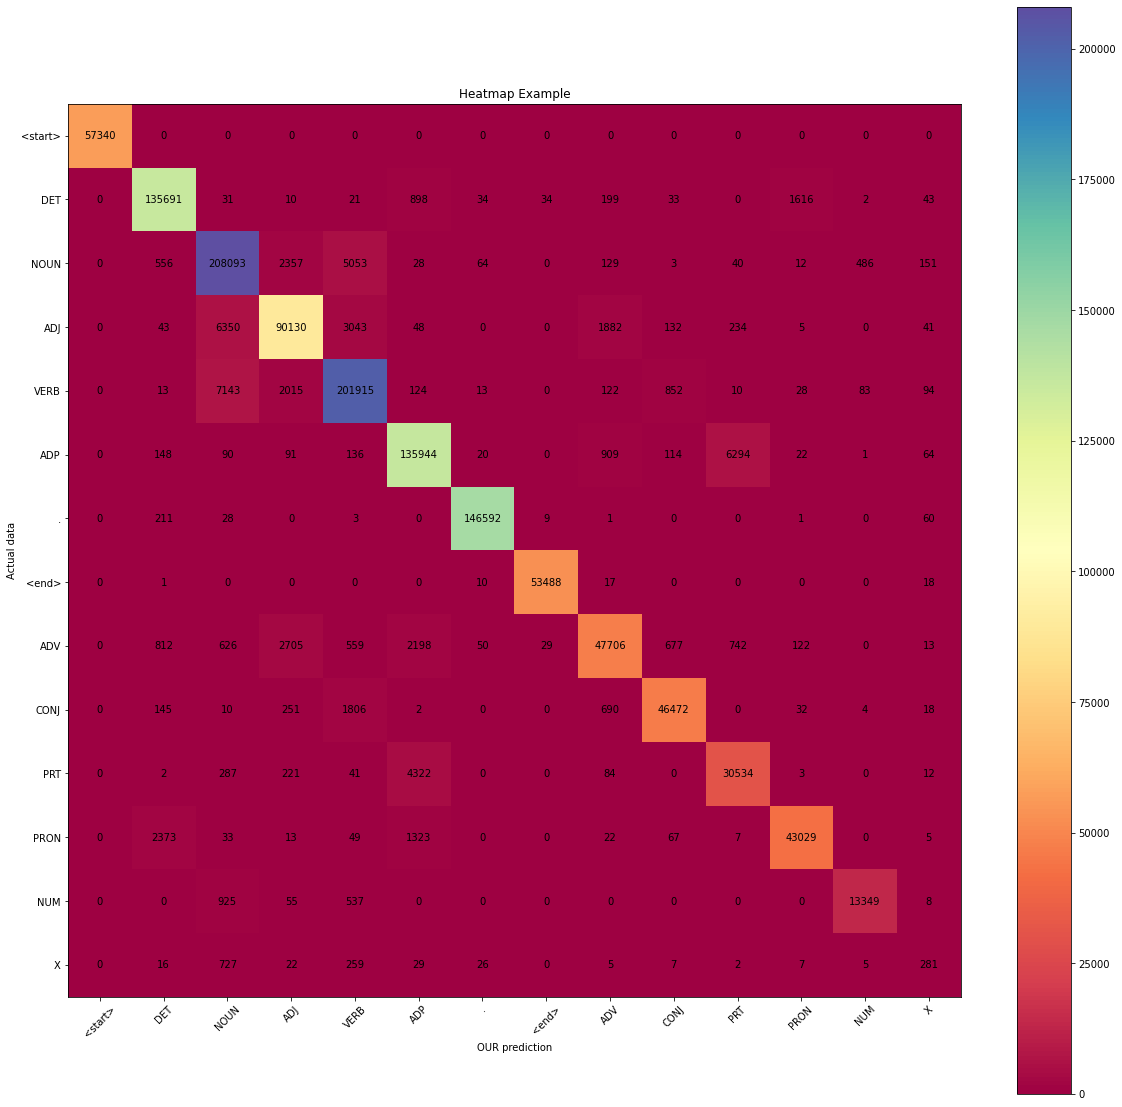

In [38]:
heatmap(model.master_confusion_matrix, model.master_idx_to_tag, model.master_idx_to_tag, "OUR prediction", "Actual data")

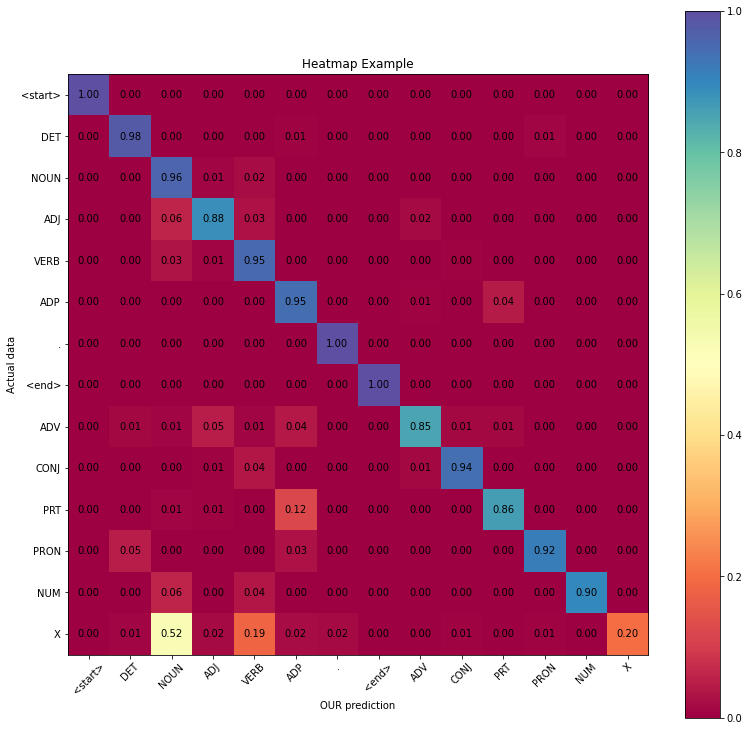

[57340, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 135691, 31, 10, 21, 898, 34, 34, 199, 33, 0, 1616, 2, 43]
[0, 556, 208093, 2357, 5053, 28, 64, 0, 129, 3, 40, 12, 486, 151]
[0, 43, 6350, 90130, 3043, 48, 0, 0, 1882, 132, 234, 5, 0, 41]
[0, 13, 7143, 2015, 201915, 124, 13, 0, 122, 852, 10, 28, 83, 94]
[0, 148, 90, 91, 136, 135944, 20, 0, 909, 114, 6294, 22, 1, 64]
[0, 211, 28, 0, 3, 0, 146592, 9, 1, 0, 0, 1, 0, 60]
[0, 1, 0, 0, 0, 0, 10, 53488, 17, 0, 0, 0, 0, 18]
[0, 812, 626, 2705, 559, 2198, 50, 29, 47706, 677, 742, 122, 0, 13]
[0, 145, 10, 251, 1806, 2, 0, 0, 690, 46472, 0, 32, 4, 18]
[0, 2, 287, 221, 41, 4322, 0, 0, 84, 0, 30534, 3, 0, 12]
[0, 2373, 33, 13, 49, 1323, 0, 0, 22, 67, 7, 43029, 0, 5]
[0, 0, 925, 55, 537, 0, 0, 0, 0, 0, 0, 0, 13349, 8]
[0, 16, 727, 22, 259, 29, 26, 0, 5, 7, 2, 7, 5, 281]


In [39]:
temp_confusion_matrix = model.master_confusion_matrix
heatmap_percent(model.master_confusion_matrix, model.master_idx_to_tag, model.master_idx_to_tag, "OUR prediction", "Actual data")
for i in model.master_confusion_matrix:
    print(i)

In [243]:
# print(temp_confusion_matrix)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.90877178e-01 2.04351221e-04 0.00000000e+00
  5.10878053e-05 7.99889066e-03 3.64912895e-05 7.29825791e-05
  7.29825791e-06 9.48773528e-05 7.29825791e-06 2.33544253e-04
  1.45965158e-05 4.01404185e-04]
 [0.00000000e+00 1.00414432e-02 9.24172044e-01 9.21040217e-03
  2.25070584e-02 1.48789003e-04 1.06003092e-02 1.40732623e-02
  2.93949005e-03 3.62900007e-06 6.53220012e-05 4.43463808e-03
  1.29555302e-03 5.08060009e-04]
 [0.00000000e+00 9.20915899e-03 1.12194073e-01 8.04839885e-01
  1.78449851e-02 8.95832587e-04 8.56415953e-03 1.40108217e-02
  2.73408105e-02 0.00000000e+00 5.97221725e-05 4.57471841e-03
  2.38888690e-05 4.41944076e-04]
 [0.00000000e+00 1.19233926e-02 5.81395349e-02 2.61012312e-03
  9.06703146e-01 8.75512996e-04 3.36525308e-03 1.15075239e-02


In [41]:
sent = ["<start>", "the", "book", "was", "so", "interesting", "that", "he", "couldn't", "put", "it", "down", "<end>"]
# sent = add_start_end_tag(sent)
print(model.HMM_logic(sent, model.master_transition_matrix, model.master_emission_matrix, model.master_tags_to_idx, model.master_word_to_idx))

['<start>', 'DET', 'NOUN', 'VERB', 'ADV', 'ADJ', 'ADP', 'PRON', 'VERB', 'VERB', 'PRON', 'PRT', '<end>']


In [42]:
import re
with open('Twitter_chatGPT_tagged_sentences.txt', 'r') as file:
    # Read all lines and store them in a list
    lines = file.readlines()
for i in range(len(lines)):
    lines[i] = lines[i].replace('\\','')
# lines[13] = lines[13].replace('\\','')
lines[6] = lines[6].replace('â€™', '')
lines[7] = lines[7].replace('â€™', '')
twitter_data = []
for string_data in lines:
    # Original string with problematic characters
    # string_data = "[('<start>', '<start>'), ('Whoâ€™', 'X'), ('is', 'VERB'), ('predicted', 'VERB'), ('to', 'ADP'), ('remain', 'VERB'), ('in', 'ADP'), ('the', 'DET'), ('top', 'NOUN'), ('10', 'NUM'), ('of', 'ADP'), ('global', 'ADJ'), ('200', 'NUM'), ('so', 'ADV'), ('please', 'ADV'), ('letâ€™s', 'VERB'), ('get', 'VERB'), ('those', 'DET'), ('streams', 'NOUN'), ('back', 'ADV'), ('to', 'ADP'), ('keep', 'VERB'), ('it', 'PRON'), ('stable', 'ADJ'), ('cuz', 'X'), ('we', 'PRON'), ('dropped', 'VERB'), (',', '.'), ('focus', 'VERB'), ('on', 'ADP'), ('Apple', 'PROPN'), ('Music', 'PROPN'), ('as', 'ADP'), ('well', 'ADV'), ('<end>', '<end>')]"

    # Remove the outer brackets and split the string into individual tuples
    tuple_strings = string_data[1:-1].split("), (")

    # List to store the parsed tuples
    tuple_list = []

    # Iterate through each tuple string
    for tuple_str in tuple_strings:
        # Remove any quotes and spaces
        tuple_str = tuple_str.strip("()")
        # Split the tuple into its two elements
        elements = re.split(r",\s*(?=['\"])", tuple_str)  # Split on comma followed by space and quote
        # Clean up each element and remove surrounding quotes
        element_1 = elements[0].strip().strip("'\"")
        element_2 = elements[1].strip().strip("'\"")
        # Append as a tuple to the list
        tuple_list.append((element_1, element_2))


    # Output the result
    # print(tuple_list)
    data =  [t for t in tuple_list if t != ('', '')]
    # print(data)
    twitter_data.append(data)


            


In [43]:
for data in twitter_data:
    print(data)

[('<start>', '<start>'), ('It', 'PRON'), ('is', 'VERB'), ('with', 'ADP'), ('immeasurable', 'ADJ'), ('grief', 'NOUN'), ('that', 'ADP'), ('we', 'PRON'), ('confirm', 'VERB'), ('the', 'DET'), ('passing', 'NOUN'), ('of', 'ADP'), ('Chadwick', 'NOUN'), ('Boseman', 'NOUN'), ('.', '.'), ('Chadwick', 'NOUN'), ('was', 'VERB'), ('diagnosed', 'VERB'), ('with', 'ADP'), ('stage', 'NOUN'), ('III', 'NUM'), ('colon', 'NOUN'), ('cancer', 'NOUN'), ('in', 'ADP'), ('2016', 'NUM'), ('and', 'CONJ'), ('battled', 'VERB'), ('with', 'ADP'), ('it', 'PRON'), ('these', 'DET'), ('last', 'ADJ'), ('4', 'NUM'), ('years', 'NOUN'), ('as', 'ADP'), ('it', 'PRON'), ('progressed', 'VERB'), ('to', 'ADP'), ('stage', 'NOUN'), ('IV', 'NUM'), ('.', '.'), ('A', 'DET'), ('true', 'ADJ'), ('fighter', 'NOUN'), ('Chadwick', 'NOUN'), ('persevered', 'VERB'), ('through', 'ADP'), ('it', 'PRON'), ('all', 'DET'), ('and', 'CONJ'), ('brought', 'VERB'), ('you', 'PRON'), ('many', 'DET'), ('of', 'ADP'), ('the', 'DET'), ('films', 'NOUN'), ('you', '

In [44]:
for i in range(0, len(twitter_data)):
    t1 = twitter_data[i][len(twitter_data[i])-1][0]
    t2 = twitter_data[i][len(twitter_data[i])-1][1].replace("')],", "")
    twitter_data[i].pop(len(twitter_data[i])-1)
    twitter_data[i].append((t1,t2))
    twitter_data[i]

In [186]:
for data in twitter_data:
    for tup in data:
        if(tup[1] == "\"<end>\'"):
            print(data)

In [45]:
predicted_data = []
for sentence in twitter_data:
    ls = []
    sent = remove_tags(sentence)
    predict = model.HMM_logic(sent)
    # print(sentence)
    for i in range(len(predict)):
        # print(predict[i])
        ls.append((sent[i], predict[i]))
    predicted_data.append(ls)


TypeError: HMM_logic() missing 4 required positional arguments: 'transition_matrix', 'emission_matrix', 'tag_to_idx', and 'word_to_idx'

In [188]:
for data in predicted_data:
    for tup in data:
        if(tup[1] == "\"<end>\'"):
            print(data)

In [189]:
print(len(predicted_data))
print(len(twitter_data))
for i in range(len(predicted_data)):
    print(len(predicted_data[i]), " ", len(twitter_data[i]))

# for i in range(len(predicted_data)):
#     check = 0
#     for j in range(len(predicted_data[i])):
#         if(predicted_data[i][j][1] == "PRT"):
#             print(predicted_data[i][j], end=" ")
#             check = 1
#     print()
#     if check == 1:
#         print(str(i) + " ", end = " ")
#         print(predicted_data[i])

74
74
22   22
8   8
10   10
9   9
21   21
9   9
17   17
9   9
9   9
11   11
8   8
9   9
10   10
21   21
9   9
19   19
9   9
19   19
21   21
22   22
9   9
9   9
10   10
10   10
8   8
17   17
11   11
21   21
10   10
19   19
12   12
21   21
20   20
21   21
11   11
10   10
10   10
10   10
9   9
20   20
9   9
19   19
7   7
11   11
13   13
14   14
12   12
16   16
12   12
14   14
14   14
9   9
11   11
12   12
14   14
15   15
12   12
16   16
12   12
14   14
11   11
18   18
11   11
12   12
12   12
12   12
11   11
11   11
16   16
10   10
13   13
12   12
11   11
12   12


In [190]:
def build_confusion_matrix(actual,predicted):
    idx_to_tag = ["<start>","DET","NOUN","ADJ","VERB","ADP",".","<end>","ADV","CONJ","PRT","PRON","NUM","X"]
    tag_to_index = {}
    idx = 0
    for tag in idx_to_tag:
        tag_to_index[tag] = idx
        idx += 1

    confusion_matrix=[]
    for i in range(len(model.count_of_each_tag)):
        confusion_matrix.append([0]*len(idx_to_tag))
    for i in range(len(actual)):
        for j in range(len(actual[i])):
            confusion_matrix[tag_to_index[actual[i][j][1]]][tag_to_index[predicted[i][j][1]]]+=1
    return confusion_matrix

In [191]:
confusion_matrix = build_confusion_matrix(predicted_data, twitter_data)
# for i in confusion_matrix:
#     print(i)

KeyError: "<end>')]"

In [142]:
def heatmap_percent(confusion_matrix, x_labels, y_labels, x_description, y_description):
    temp = confusion_matrix
    data = []
    for i in range(len(temp)):
        sum = 0
        for j in range(len(temp[i])):
            sum += temp[i][j]
        data.append(sum)
    # data = np.sum(temp,axis=1)
    
    print(data)
    # Example data
    for i in range(len(temp)):
        for j in range(len(temp[i])):
            temp[i][j]/=data[i]
    temp = np.array(temp)
    
    
    plt.figure(figsize=(13,13))
    # Create the heatmap
    plt.imshow(temp,  cmap='Spectral', interpolation='none')

    # Add a colorbar
    plt.colorbar()

    for i in range(temp.shape[0]):
        for j in range(temp.shape[1]):
            plt.text(j, i, f'{temp[i, j]:.2f}', ha='center', va='center', color='black')

    # Add labels (optional)
    
    plt.title('Heatmap Example')
    plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, rotation=45)  # Rotation for better readability
    plt.yticks(ticks=np.arange(len(y_labels)), labels=y_labels)

    plt.xlabel(x_description)
    plt.ylabel(y_description)
    # Display the plot
    return plt.show()


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


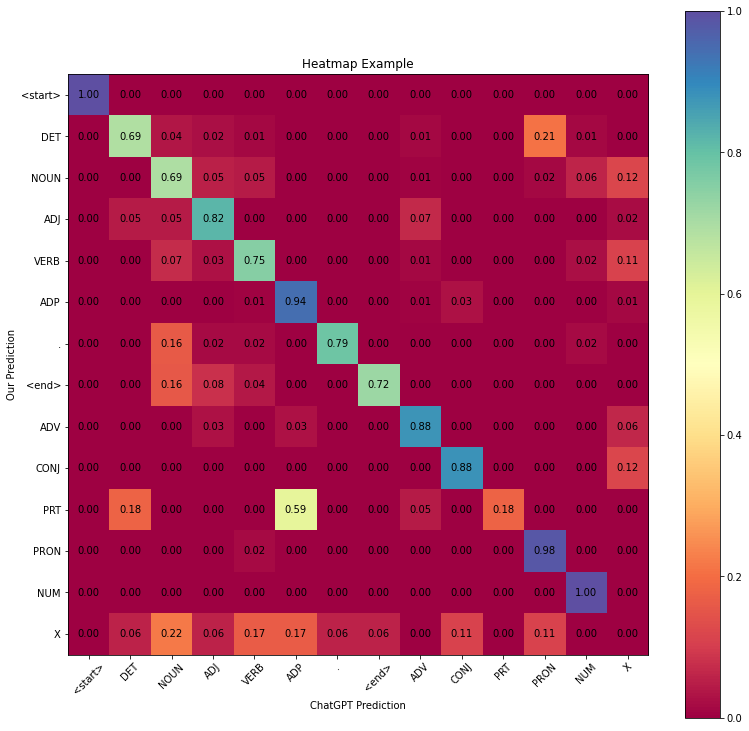

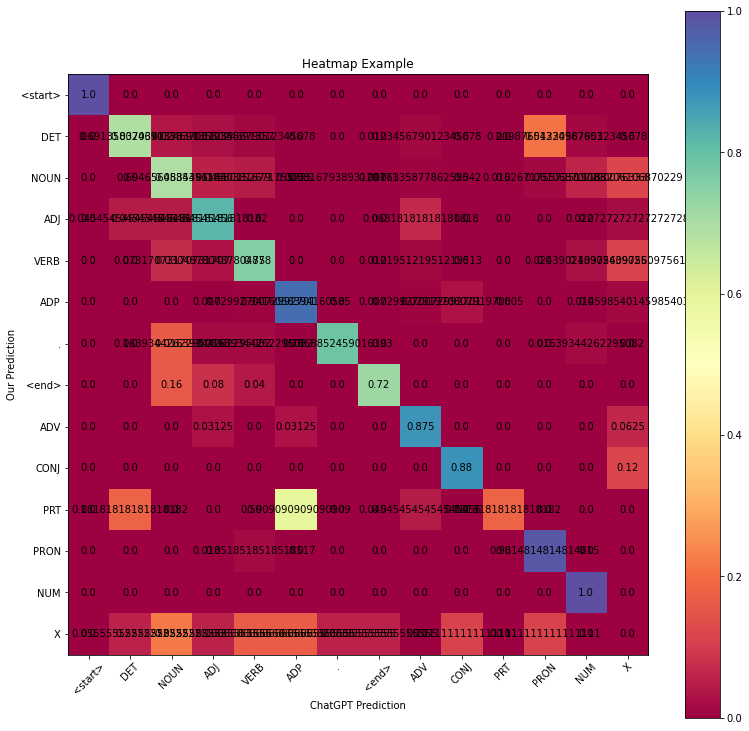

In [141]:
idx_to_tag = ["<start>","DET","NOUN","ADJ","VERB","ADP",".","<end>","ADV","CONJ","PRT","PRON","NUM","X"]
heatmap_percent(confusion_matrix, idx_to_tag, idx_to_tag, "ChatGPT Prediction" , "Our Prediction")
heatmap(confusion_matrix, idx_to_tag, idx_to_tag, "ChatGPT Prediction" , "Our Prediction")

[11468.0, 27403.800000000003, 55111.6, 16744.199999999997, 36550.0, 28953.200000000004, 29512.999999999996, 11468.0, 11247.799999999997, 7630.2, 5965.799999999999, 9866.8, 2974.7999999999997, 277.20000000000005]


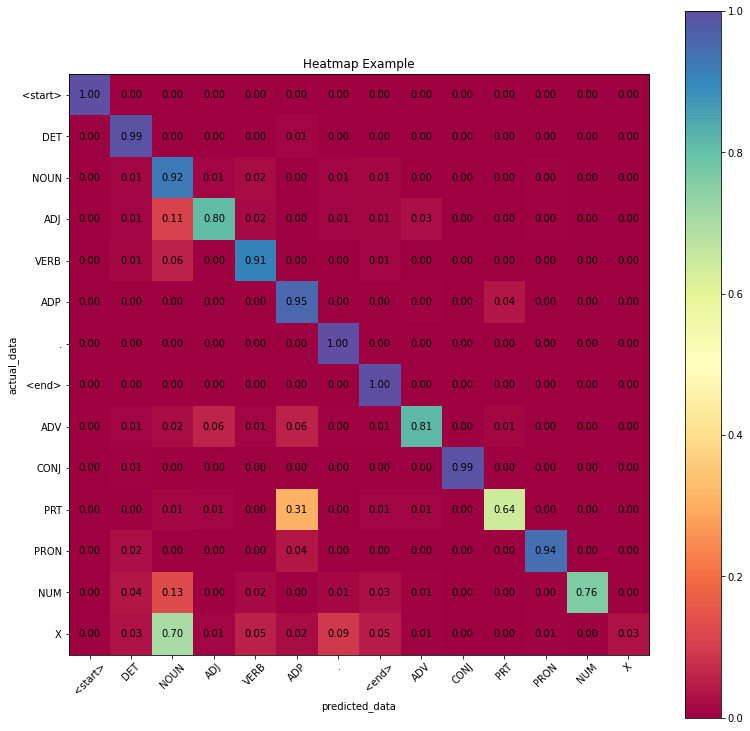

In [118]:
heatmap_percent(model.confusion_matrix, model.idx_to_tag, idx_to_tag, "predicted_data", "actual_data")

In [120]:
# Sample list
# my_list = ['apple', 'banana', 'cherry']

# Open a file in write mode
with open('twitter_predicted_data.txt', 'w') as file:
    for item in predicted_data:
        file.write(f"{item}\n")


In [21]:
def highlight_differences(list1, list2, filename, sample_number):
    with open(filename, 'a') as file:
        # Determine the maximum length of the lists
        max_len = max(len(list1), len(list2))
        file.write(f"-----------------Showing differneces for sample {sample_number + 1}----------------\n                 (our Model) vs (chatGPT)\n\n")
        line1=""
        line2=""
        for i in range(max_len):
            elem1 = list1[i] if i < len(list1) else ''
            elem2 = list2[i] if i < len(list2) else ''
            
            if elem1 != elem2:
                # Highlight differences by marking with asterisks or other symbols

                line1 += f"*{elem1}* "
                line2 += f"*{elem2}* "
                line = f"Position {i + 1}: *{elem1}* vs *{elem2}*\n"
            else:
                line = f"Position {i + 1}: {elem1} vs {elem2}\n"
                line1 += f"{elem1} "
                line2 += f"{elem2} "
            
        line1 += "\n"
        line2 += "\n"
        file.write(line1)
        file.write(line2)
        file.write("\n------------------------------------------------------------------\n\n")

# Example usage
# list1 = ['apple', 'banana', 'cherry']
# list2 = ['apple', 'blueberry', 'cherry']
# predicted_data[0]
twitter_data[0]
for i in range(len(twitter_data)):
    highlight_differences(predicted_data[i], twitter_data[i], f'temp.txt', i)


In [83]:
print(len(predicted_data))
print(len(twitter_data))
# for i in range(len(predicted_data)):
#     print(len(predicted_data[i]), " ", len(twitter_data[i]))

for i in range(len(twitter_data)):
    check = 0
    for j in range(len(twitter_data[i])):
        if(twitter_data[i][j][1] == "PRT"):
            print(twitter_data[i][j], end=" ")
            check = 1
    print()
    if check == 1:
        print(str(i) + " ", end = " ")
        print(twitter_data[i])
print("-------------------------------------------------------------------")
for i in range(len(predicted_data)):
    check = 0
    for j in range(len(predicted_data[i])):
        if(predicted_data[i][j][1] == "PRT"):
            print(predicted_data[i][j], end=" ")
            check = 1
    print()
    if check == 1:
        print(str(i) + " ", end = " ")
        print(predicted_data[i])

20
20







('up', 'PRT') 
7  [('<start>', '<start>'), ('She', 'PRON'), ('said', 'VERB'), ('she', 'PRON'), ('', 'X'), ('ll', 'X'), ('give', 'VERB'), ('200', 'NUM'), ('for', 'ADP'), ('him', 'PRON'), ('to', 'ADP'), ('fix', 'VERB'), ('it', 'PRON'), ('this', 'DET'), ('dude', 'NOUN'), ('is', 'VERB'), ('milking', 'VERB'), ('this', 'DET'), ('whole', 'ADJ'), ('situation', 'NOUN'), ('bro', 'X'), ('bouta', 'X'), ('come', 'VERB'), ('back', 'ADV'), ('and', 'CONJ'), ('offer', 'VERB'), ('300', 'NUM'), ('to', 'ADP'), ('just', 'ADV'), ('make', 'VERB'), ('it', 'PRON'), ('blow', 'VERB'), ('up', 'PRT'), ('when', 'ADP'), ('she', 'PRON'), ('turns', 'VERB'), ('it', 'PRON'), ('on', 'ADP'), ('.', '.'), ('<end>', '<end>')]



('out', 'PRT') 
11  [('<start>', '<start>'), ('For', 'ADP'), ('the', 'DET'), ('first', 'ADJ'), ('time', 'NOUN'), ('the', 'DET'), ('public', 'NOUN'), ('include', 'VERB'), ('Â£200/yr', 'NUM'), ('for', 'ADP'), ('health', 'NOUN'), ('costs', 'NOUN'), ('like', 'ADP'), ('private', 'ADJ'), ('den

In [72]:
sent = remove_tags_quotes([('<start>', '<start>'), ('Pakistan', 'NOUN'), ('might', 'VERB'), ('have', 'VERB'), ('been', 'VERB'), ('bowled', 'VERB'), ('out', 'ADP'), ('by', 'ADP'), ('now', 'ADV'), ('if', 'ADP'), ('Rizwan', 'NOUN'), ('hadn’t', 'VERB'), ('been', 'VERB'), ('dropped', 'VERB'), ('on', 'ADP'), ('0', 'NUM'), ('.', '.'), ('He’s', 'PRON'), ('now', 'ADV'), ('on', 'ADP'), ('38*', 'NUM'), ('and', 'CONJ'), ('looking', 'VERB'), ('to', 'ADP'), ('score', 'VERB'), ('runs', 'NOUN'), ('quickly', 'ADV'), ('.', '.'), ('We', 'PRON'), ('need', 'VERB'), ('to', 'ADP'), ('stop', 'VERB'), ('him', 'PRON'), ('before', 'ADP'), ('they', 'PRON'), ('reach', 'VERB'), ('200', 'NUM'), ('.', '.'), ('If', 'ADP'), ('they', 'PRON'), ('set', 'VERB'), ('us', 'PRON'), ('a', 'DET'), ('target', 'NOUN'), ('of', 'ADP'), ('230/250', 'NUM'), (',', '.'), ('then', 'ADV'), ('we', 'PRON'), ('’re', 'VERB'), ('in', 'ADP'), ('trouble', 'NOUN'), ('.', '.'), ('<end>', '<end>')])
print(sent)
# models=[]
# for i in range(2,11):
#     model=HMM_model()
#     model.train_model(sentences_original, i)
#     models.append(model)
#     print("Accuracy of k = ", i," is = ", accuracy_calculator(model.confusion_matrix))


 <start> Pakistan might have been bowled out by now if Rizwan hadn’t been dropped on 0 . He’s now on 38* and looking to score runs quickly . We need to stop him before they reach 200 . If they set us a target of 230/250 , then we ’re in trouble . <end>


In [38]:
def remove_tags_quotes(sentence):
    new_sentence=""
    for i in sentence:
        new_sentence = new_sentence + " " + i[0]

    # print(new_sentence)

    return new_sentence

In [126]:
import re
with open('chatGPT_tagged_sentences.txt', 'r') as file:
    # Read all lines and store them in a list
    lines = file.readlines()

# for i in range(len(lines)):
#     lines[i] = lines[i].replace('\\','')
# lines[13] = lines[13].replace('\\','')
# lines[6] = lines[6].replace('â€™', '')
# lines[7] = lines[7].replace('â€™', '')
# sentence_data = []
for string_data in lines:
    # Original string with problematic characters
    # string_data = "[('<start>', '<start>'), ('Whoâ€™', 'X'), ('is', 'VERB'), ('predicted', 'VERB'), ('to', 'ADP'), ('remain', 'VERB'), ('in', 'ADP'), ('the', 'DET'), ('top', 'NOUN'), ('10', 'NUM'), ('of', 'ADP'), ('global', 'ADJ'), ('200', 'NUM'), ('so', 'ADV'), ('please', 'ADV'), ('letâ€™s', 'VERB'), ('get', 'VERB'), ('those', 'DET'), ('streams', 'NOUN'), ('back', 'ADV'), ('to', 'ADP'), ('keep', 'VERB'), ('it', 'PRON'), ('stable', 'ADJ'), ('cuz', 'X'), ('we', 'PRON'), ('dropped', 'VERB'), (',', '.'), ('focus', 'VERB'), ('on', 'ADP'), ('Apple', 'PROPN'), ('Music', 'PROPN'), ('as', 'ADP'), ('well', 'ADV'), ('<end>', '<end>')]"

    # Remove the outer brackets and split the string into individual tuples
    tuple_strings = string_data[1:-1].split("), (")
    # print(tuple_str)
    # List to store the parsed tuples
    sentence_data = []
    print(tuple_strings[0])

    # Iterate through each tuple string
    for tuple_str in tuple_strings:
        # Remove any quotes and spaces
        tuple_str = tuple_str.strip("()")
        # Split the tuple into its two elements
        elements = re.split(r",\s*(?=['\"])", tuple_str)  # Split on comma followed by space and quote
        # Clean up each element and remove surrounding quotes
        element_1 = elements[0].strip().strip("'\"")
        element_2 = elements[1].strip().strip("'\"")
        # Append as a tuple to the list
        tuple_list.append((element_1, element_2))


    # Output the result
    # print(tuple_list)
    data =  [t for t in tuple_list if t != ('', '')]
    # print(data)
    # sentence_data.append(data)
# for sent in sentence_data:
#     print(sent)
# print(sentence_data)


            


('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>', '<start>'
('<start>'

In [156]:
print("recall : ", recall(confusion_matrix))
print(count_of_each_tag)

recall :  [1.0, 0.9909063706493257, 0.9300074757401345, 0.8145029323586673, 0.905909712722298, 0.9531174447038668, 0.9994985260732557, 0.999598883850715, 0.8188267927950353, 0.990118214463579, 0.6401153240135438, 0.9382170511209308, 0.7786069651741292, 0.03391053391053392]
[57340, 137019, 275558, 83721, 182750, 144766, 147565, 57340, 56239, 38151, 29829, 49334, 14874, 1386]


In [76]:
print("precision : ", precision(confusion_matrix))

precision :  [1.0, 0.941530812257972, 0.8986341991959168, 0.879624516841524, 0.9668998128263225, 0.8679951446489986, 0.9779384563645536, 0.8877961901811987, 0.9195839391566939, 0.9899966655551851, 0.7854426002766252, 0.9751655629139073, 0.9314671814671814, 0.04]


In [82]:
print(accuracy_calculator(np_master_confusion_matrix))

0.9285327995284794


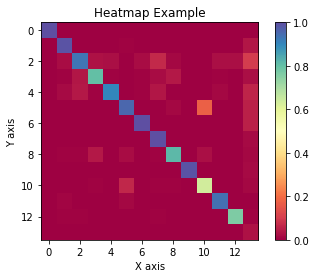

None
{'<start>': 0, 'DET': 1, 'NOUN': 2, 'ADJ': 3, 'VERB': 4, 'ADP': 5, '.': 6, '<end>': 7, 'ADV': 8, 'CONJ': 9, 'PRT': 10, 'PRON': 11, 'NUM': 12, 'X': 13}


In [83]:
print(heatmap(np_master_confusion_matrix))
print(master_tag_to_idx)

In [19]:
input_sentence1=["<start>", "Though","he","was","good","looking",",","she","rejected","him", ".", "<end>"]
tags_output= models[4].HMM_logic(input_sentence1)
print(tags_output)

['<start>', 'ADP', 'PRON', 'VERB', 'ADJ', 'VERB', '.', 'PRON', 'VERB', 'PRON', '.', '<end>']


In [23]:
s = input().split(" ")
s=["<start>"]+s+["<end>"]
print(s)
tags_output= models[4].HMM_logic(s)
p=[(s[i],tags_output[i]) for i in range(len(s))]
print(p)

SyntaxError: invalid syntax (34197387.py, line 5)